# simulated luminous galaxies that are red in UV

In [1]:
import os 
import sys 
import h5py 
import numpy as np 
import corner as DFM 
# -- galpopfm --
from galpopfm.catalogs import Catalog
from galpopfm import dustfm as dustFM
from galpopfm import dust_infer as dustInfer
from galpopfm import measure_obs as measureObs

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
def fm(sim, theta): 
    ''' read specified simulations and run through forward model.  
    '''
    _sim_sed = dustInfer._read_sed(sim) 
    wlim = (_sim_sed['wave'] > 1e3) & (_sim_sed['wave'] < 8e3) 

    zerosfr = (_sim_sed['logsfr.inst'] == -999)

    sim_sed = {} 
    sim_sed['sim']          = sim 
    sim_sed['logmstar']     = _sim_sed['logmstar'].copy()
    sim_sed['logsfr.inst']  = _sim_sed['logsfr.inst'].copy() 
    sim_sed['wave']         = _sim_sed['wave'][wlim].copy()
    sim_sed['sed_noneb']    = _sim_sed['sed_noneb'][:,wlim].copy() 
    sim_sed['sed_onlyneb']  = _sim_sed['sed_onlyneb'][:,wlim].copy() 
    
    x_mod, cuts = dustInfer.sumstat_model(
            theta, 
            sed=sim_sed, 
            dem='slab_noll_mssfr_fixbump',
            statistic='2d', 
            sfr0_prescription='sfrmin', 
            noise=False, 
            return_datavector=True) 
    
    sim_sed['logmstar'] = sim_sed['logmstar'][cuts] 
    sim_sed['logsfr.inst'] = sim_sed['logsfr.inst'][cuts]
    sim_sed['sed_noneb'] = sim_sed['sed_noneb'][cuts,:]
    return x_mod, sim_sed, zerosfr[cuts]

In [4]:
x_simba, simba, sfr0_simba = fm('simba', np.zeros(6))
x_eagle, eagle, sfr0_eagle = fm('eagle', np.zeros(6))
x_tng, tng, sfr0_tng = fm('tng', np.zeros(6))

(-1.0, 4.0)

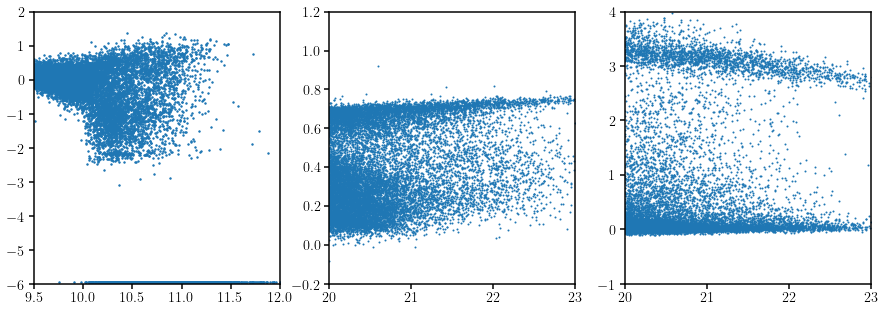

In [5]:
fig = plt.figure(figsize=(15, 5))
sub = fig.add_subplot(131)
sub.scatter(simba['logmstar'][x_simba[0] > 20], simba['logsfr.inst'][x_simba[0] > 20], s=2)
sub.set_xlim(9.5, 12)
sub.set_ylim(-6, 2)

sub = fig.add_subplot(132)
sub.scatter(x_simba[0], x_simba[1], s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-0.2, 1.2)

sub = fig.add_subplot(133)
sub.scatter(x_simba[0], x_simba[2], s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-1, 4)

## identify quiescent based on SSFR

In [6]:
quiescent = (simba['logsfr.inst'] - simba['logmstar'] < -11)

(-1.0, 4.0)

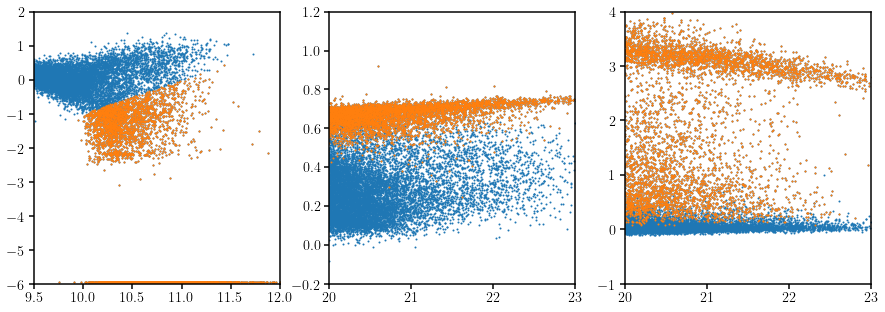

In [7]:
fig = plt.figure(figsize=(15, 5))
sub = fig.add_subplot(131)
sub.scatter(simba['logmstar'][x_simba[0] > 20], simba['logsfr.inst'][x_simba[0] > 20], s=1)
sub.scatter(simba['logmstar'][(x_simba[0] > 20) & quiescent], 
            simba['logsfr.inst'][(x_simba[0] > 20) & quiescent],s=1)
sub.set_xlim(9.5, 12)
sub.set_ylim(-6, 2)

sub = fig.add_subplot(132)
sub.scatter(x_simba[0], x_simba[1], s=1)
sub.scatter(x_simba[0][quiescent], x_simba[1][quiescent], s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-0.2, 1.2)

sub = fig.add_subplot(133)
sub.scatter(x_simba[0], x_simba[2], s=1)
sub.scatter(x_simba[0][quiescent], x_simba[2][quiescent], s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-1, 4)

All of the galaxies with $FUV - NUV > 2.5$ are quiescent. But what's the difference between quiescent galaxies with $FUV - NUV < 2.5$ and $FUV - NUV > 2.5$. 

In [8]:
uv_red = (x_simba[2] > 2.5)

(-1.0, 4.0)

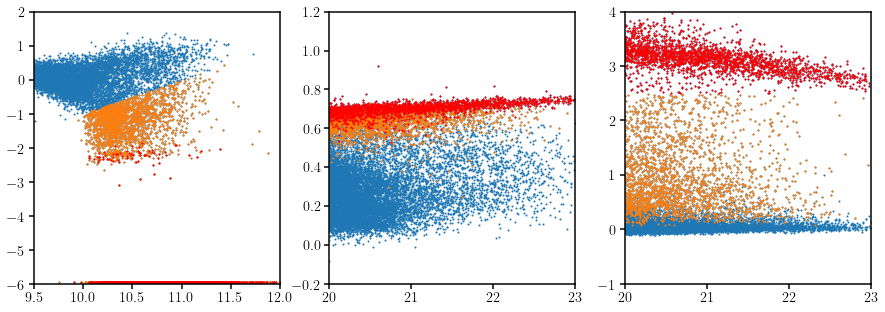

In [9]:
fig = plt.figure(figsize=(15, 5))
sub = fig.add_subplot(131)
sub.scatter(simba['logmstar'][x_simba[0] > 20], simba['logsfr.inst'][x_simba[0] > 20],s=1)
sub.scatter(simba['logmstar'][(x_simba[0] > 20) & quiescent], 
            simba['logsfr.inst'][(x_simba[0] > 20) & quiescent],s=1)
sub.scatter(simba['logmstar'][(x_simba[0] > 20) & quiescent & uv_red], 
            simba['logsfr.inst'][(x_simba[0] > 20) & quiescent & uv_red], c='r', s=1)
sub.set_xlim(9.5, 12)
sub.set_ylim(-6, 2)

sub = fig.add_subplot(132)
sub.scatter(x_simba[0], x_simba[1], s=1)
sub.scatter(x_simba[0][quiescent & ~uv_red], x_simba[1][quiescent & ~uv_red], c='C1', s=1)
sub.scatter(x_simba[0][quiescent & uv_red], x_simba[1][quiescent & uv_red], c='r', s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-0.2, 1.2)

sub = fig.add_subplot(133)
sub.scatter(x_simba[0], x_simba[2], s=1)
sub.scatter(x_simba[0][quiescent & ~uv_red], x_simba[2][quiescent & ~uv_red], c='C1', s=1)
sub.scatter(x_simba[0][quiescent & uv_red], x_simba[2][quiescent & uv_red], c='r', s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-1, 4)

Galaxies with $FUV - NUV > 2.5$ have very little SFR. In fact, many of them are SFR = 0 galaxies. 

(-1.0, 4.0)

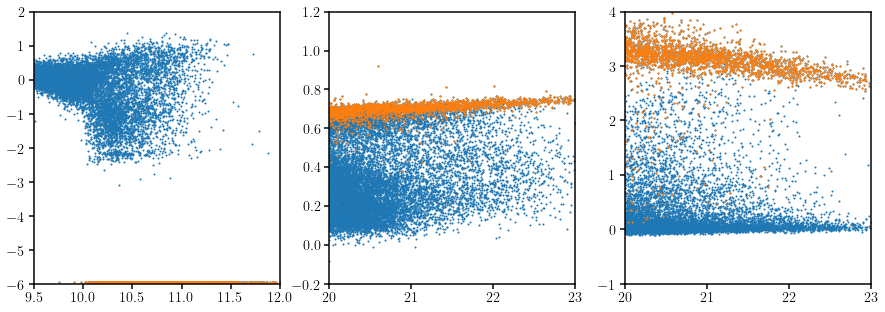

In [10]:
fig = plt.figure(figsize=(15, 5))
sub = fig.add_subplot(131)
sub.scatter(simba['logmstar'][x_simba[0] > 20], simba['logsfr.inst'][x_simba[0] > 20],s=1)
sub.scatter(simba['logmstar'][(x_simba[0] > 20) & sfr0_simba], simba['logsfr.inst'][(x_simba[0] > 20) & sfr0_simba], s=1)
sub.set_xlim(9.5, 12)
sub.set_ylim(-6, 2)

sub = fig.add_subplot(132)
sub.scatter(x_simba[0], x_simba[1], s=1)
sub.scatter(x_simba[0][sfr0_simba], x_simba[1][sfr0_simba], c='C1', s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-0.2, 1.2)

sub = fig.add_subplot(133)
sub.scatter(x_simba[0], x_simba[2], s=1)
sub.scatter(x_simba[0][sfr0_simba], x_simba[2][sfr0_simba], c='C1', s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-1, 4)

However, not all SFR=0 galaxies have $FUV - NUV > 2.5$... Ultimately, SFR doesn't impact the FUV, NUV color. Since that's determined by the SFH and ZH. 

Next, lets look at the SED of the $FUV - NUV > 2.5$ quiescent galaxies and compare them to similar $FUV-NUV < 2.5$ quiescen galaxies

In [11]:
igal_regular_q = np.random.choice(np.arange(len(simba['logmstar']))[quiescent & ~uv_red & (simba['logmstar'] > 10.5) & (simba['logmstar'] < 10.6)], size=1)
igal_uvred_q = np.random.choice(np.arange(len(simba['logmstar']))[quiescent & uv_red & (simba['logmstar'] > 10.5) & (simba['logmstar'] < 10.6)], size=1)

(-1.0, 4.0)

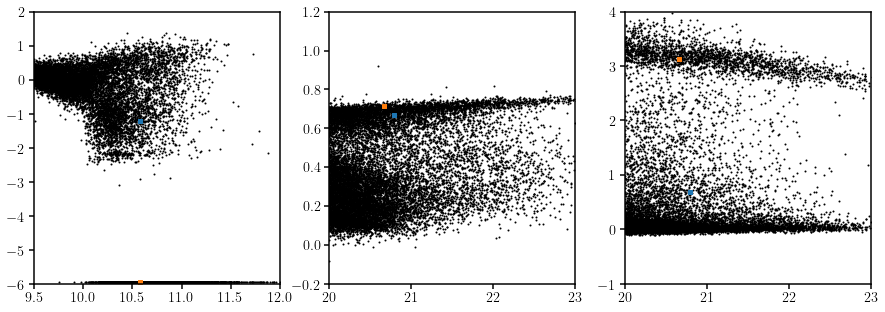

In [12]:
fig = plt.figure(figsize=(15, 5))
sub = fig.add_subplot(131)
sub.scatter(simba['logmstar'][x_simba[0] > 20], simba['logsfr.inst'][x_simba[0] > 20], c='k', s=1)
sub.scatter(simba['logmstar'][igal_regular_q], simba['logsfr.inst'][igal_regular_q], marker='s', s=20)
sub.scatter(simba['logmstar'][igal_uvred_q], simba['logsfr.inst'][igal_uvred_q], marker='s', s=20)
sub.set_xlim(9.5, 12)
sub.set_ylim(-6, 2)

sub = fig.add_subplot(132)
sub.scatter(x_simba[0], x_simba[1], c='k', s=1)
sub.scatter(x_simba[0][igal_regular_q], x_simba[1][igal_regular_q], marker='s', s=20)
sub.scatter(x_simba[0][igal_uvred_q], x_simba[1][igal_uvred_q], marker='s', s=20)
sub.set_xlim(20, 23)
sub.set_ylim(-0.2, 1.2)

sub = fig.add_subplot(133)
sub.scatter(x_simba[0], x_simba[2], c='k', s=1)
sub.scatter(x_simba[0][igal_regular_q], x_simba[2][igal_regular_q], marker='s', s=20)
sub.scatter(x_simba[0][igal_uvred_q], x_simba[2][igal_uvred_q], marker='s', s=20)
sub.set_xlim(20, 23)
sub.set_ylim(-1, 4)

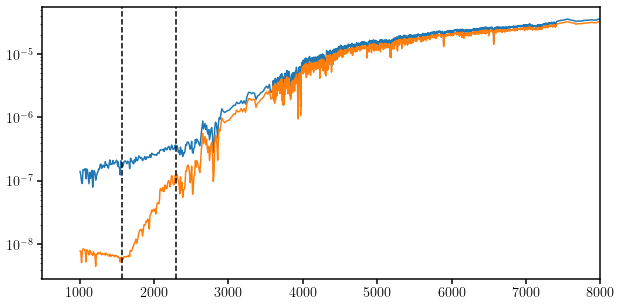

In [13]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.plot(simba['wave'], simba['sed_noneb'][igal_regular_q,:].flatten())
sub.plot(simba['wave'], simba['sed_noneb'][igal_uvred_q,:].flatten())
sub.axvline(1565, color='k', linestyle='--')
sub.axvline(2300, color='k', linestyle='--')
sub.set_xlim(500, 8e3)
sub.set_yscale('log')

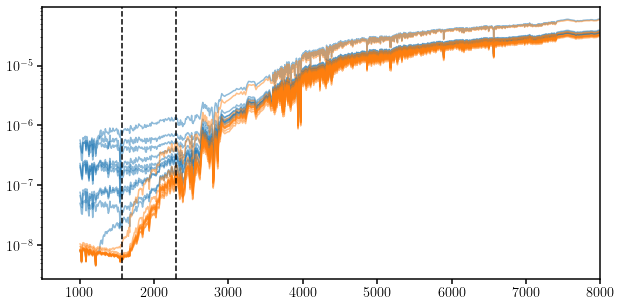

In [14]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for ii in np.random.choice(np.arange(len(simba['logmstar']))[quiescent & ~uv_red & (simba['logmstar'] > 10.5) & (simba['logmstar'] < 10.6)], size=10, replace=False):
    sub.plot(simba['wave'], simba['sed_noneb'][ii,:].flatten(), c='C0', alpha=0.5)
    
for ii in np.random.choice(np.arange(len(simba['logmstar']))[quiescent & uv_red & (simba['logmstar'] > 10.5) & (simba['logmstar'] < 10.6)], size=10, replace=False):
    sub.plot(simba['wave'], simba['sed_noneb'][ii,:].flatten(), c='C1', alpha=0.5)
sub.axvline(1565, color='k', linestyle='--')
sub.axvline(2300, color='k', linestyle='--')
sub.set_xlim(500, 8e3)
sub.set_yscale('log')

# eagle

(-1.0, 4.0)

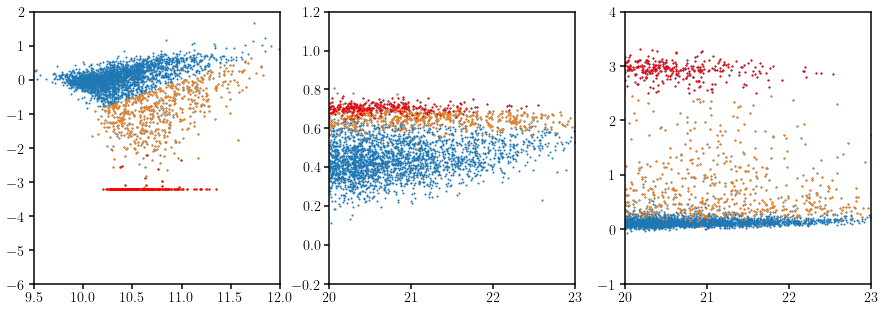

In [15]:
quiescent = (eagle['logsfr.inst'] - eagle['logmstar'] < -11)
uv_red = (x_eagle[2] > 2.5)

fig = plt.figure(figsize=(15, 5))
sub = fig.add_subplot(131)
sub.scatter(eagle['logmstar'][x_eagle[0] > 20], eagle['logsfr.inst'][x_eagle[0] > 20],s=1)
sub.scatter(eagle['logmstar'][(x_eagle[0] > 20) & quiescent], 
            eagle['logsfr.inst'][(x_eagle[0] > 20) & quiescent],s=1)
sub.scatter(eagle['logmstar'][(x_eagle[0] > 20) & quiescent & uv_red], 
            eagle['logsfr.inst'][(x_eagle[0] > 20) & quiescent & uv_red], c='r', s=1)
sub.set_xlim(9.5, 12)
sub.set_ylim(-6, 2)

sub = fig.add_subplot(132)
sub.scatter(x_eagle[0], x_eagle[1], s=1)
sub.scatter(x_eagle[0][quiescent & ~uv_red], x_eagle[1][quiescent & ~uv_red], c='C1', s=1)
sub.scatter(x_eagle[0][quiescent & uv_red], x_eagle[1][quiescent & uv_red], c='r', s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-0.2, 1.2)

sub = fig.add_subplot(133)
sub.scatter(x_eagle[0], x_eagle[2], s=1)
sub.scatter(x_eagle[0][quiescent & ~uv_red], x_eagle[2][quiescent & ~uv_red], c='C1', s=1)
sub.scatter(x_eagle[0][quiescent & uv_red], x_eagle[2][quiescent & uv_red], c='r', s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-1, 4)

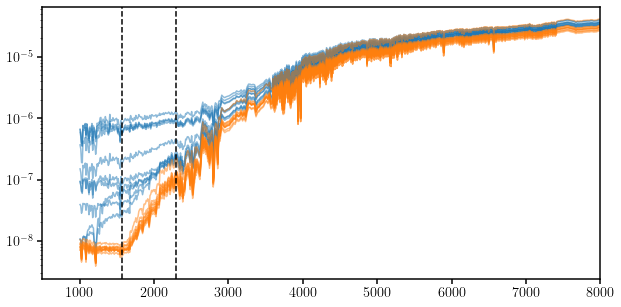

In [17]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for ii in np.random.choice(np.arange(len(eagle['logmstar']))[quiescent & ~uv_red & (eagle['logmstar'] > 10.5) & (eagle['logmstar'] < 10.6)], size=10, replace=False):
    sub.plot(eagle['wave'], eagle['sed_noneb'][ii,:].flatten(), c='C0', alpha=0.5)
    
for ii in np.random.choice(np.arange(len(eagle['logmstar']))[quiescent & uv_red & (eagle['logmstar'] > 10.5) & (eagle['logmstar'] < 10.6)], size=10, replace=False):
    sub.plot(eagle['wave'], eagle['sed_noneb'][ii,:].flatten(), c='C1', alpha=0.5)
sub.axvline(1565, color='k', linestyle='--')
sub.axvline(2300, color='k', linestyle='--')
sub.set_xlim(500, 8e3)
sub.set_yscale('log')

# TNG

(-1.0, 4.0)

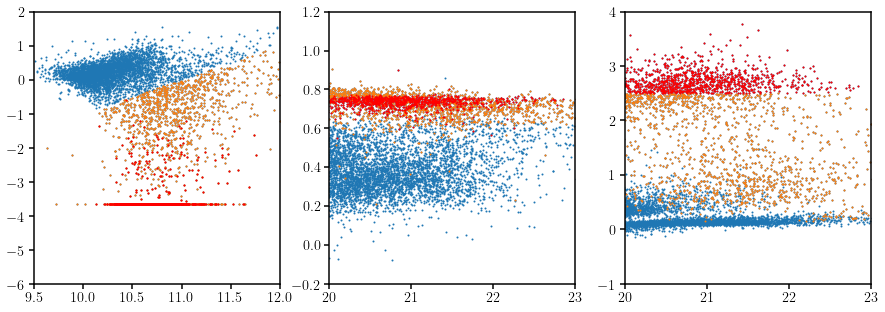

In [18]:
quiescent = (tng['logsfr.inst'] - tng['logmstar'] < -11)
uv_red = (x_tng[2] > 2.5)

fig = plt.figure(figsize=(15, 5))
sub = fig.add_subplot(131)
sub.scatter(tng['logmstar'][x_tng[0] > 20], tng['logsfr.inst'][x_tng[0] > 20],s=1)
sub.scatter(tng['logmstar'][(x_tng[0] > 20) & quiescent], 
            tng['logsfr.inst'][(x_tng[0] > 20) & quiescent],s=1)
sub.scatter(tng['logmstar'][(x_tng[0] > 20) & quiescent & uv_red], 
            tng['logsfr.inst'][(x_tng[0] > 20) & quiescent & uv_red], c='r', s=1)
sub.set_xlim(9.5, 12)
sub.set_ylim(-6, 2)

sub = fig.add_subplot(132)
sub.scatter(x_tng[0], x_tng[1], s=1)
sub.scatter(x_tng[0][quiescent & ~uv_red], x_tng[1][quiescent & ~uv_red], c='C1', s=1)
sub.scatter(x_tng[0][quiescent & uv_red], x_tng[1][quiescent & uv_red], c='r', s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-0.2, 1.2)

sub = fig.add_subplot(133)
sub.scatter(x_tng[0], x_tng[2], s=1)
sub.scatter(x_tng[0][quiescent & ~uv_red], x_tng[2][quiescent & ~uv_red], c='C1', s=1)
sub.scatter(x_tng[0][quiescent & uv_red], x_tng[2][quiescent & uv_red], c='r', s=1)
sub.set_xlim(20, 23)
sub.set_ylim(-1, 4)

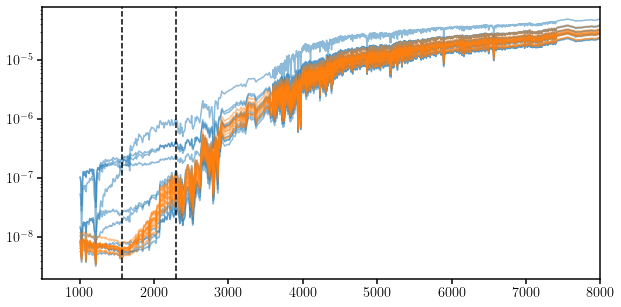

In [20]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for ii in np.random.choice(np.arange(len(tng['logmstar']))[quiescent & ~uv_red & (tng['logmstar'] > 10.5) & (tng['logmstar'] < 10.6)], size=10, replace=False):
    sub.plot(tng['wave'], tng['sed_noneb'][ii,:].flatten(), c='C0', alpha=0.5)
    
for ii in np.random.choice(np.arange(len(tng['logmstar']))[quiescent & uv_red & (tng['logmstar'] > 10.5) & (tng['logmstar'] < 10.6)], size=10, replace=False):
    sub.plot(tng['wave'], tng['sed_noneb'][ii,:].flatten(), c='C1', alpha=0.5)
sub.axvline(1565, color='k', linestyle='--')
sub.axvline(2300, color='k', linestyle='--')
sub.set_xlim(500, 8e3)
sub.set_yscale('log')